OBJ:
* Calculate naive result score on training set.

In [1]:
import pandas as pd
import numpy as np

## Load data

In [2]:
from src.data.io import import_and_prep_target_df_from_pickle, import_and_merge_feature_dfs_from_pickles

In [3]:
df = import_and_prep_target_df_from_pickle('./../../data/interim/D3_dailyTS/EDdaily_occupancy_classRollQ90_clipped.pkl')

df.head()

,flag_target,EDMeanOcc_prevday
dt_date,,
2011-09-01,0,NaN
2011-09-02,0,28.000000
2011-09-03,0,36.833333
2011-09-04,0,29.291667
2011-09-05,0,36.833333


In [4]:
df.shape

(2587, 2)

## Split data

In [5]:
from src.data.preprocess import make_timeseries_test_train_splits
X_train, X_test, y_train, y_test = make_timeseries_test_train_splits(df, 'flag_target', 365)

DATA POINTS:
orig size 2587
training:  2222
testing:  365


## Prepare data

**Limit data to those which are used in evaluation of other data set?** - 1776 with (but may change based on new models?!)

In [6]:
no_records = 2000

In [7]:
y_NAIVE_prev_day = y_train.shift(1)[-no_records:]

In [8]:
y_NAIVE_prev_week = y_train.shift(7)[-no_records:]
y_true = y_train[-no_records:]

In [9]:
y_NAIVE_prev_week_RollMedian = y_train.rolling(7).median()[-no_records:]


## Model search

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, TimeSeriesSplit

## Evaluation using CV on training set

In [11]:
from src.eval.eval_utils import cross_val_predict_tscv, BinLabelEval

In [12]:
BinLabelEval(y_NAIVE_prev_day, y_true)

AUC:  0.663
F1 score:  0.419
accuracy:  0.84
precision score:  0.42
recall scare:  0.418


In [13]:
BinLabelEval(y_NAIVE_prev_week, y_true)

AUC:  0.585
F1 score:  0.284
accuracy:  0.804
precision score:  0.285
recall scare:  0.284


In [14]:
BinLabelEval(y_NAIVE_prev_week_RollMedian, y_true)

AUC:  0.733
F1 score:  0.294
accuracy:  0.87
precision score:  0.197
recall scare:  0.581


#### baseline model results for reference:



In [1]:
break

SyntaxError: 'break' outside loop (<ipython-input-1-6aaf1f276005>, line 4)

In [63]:
proba_preds, label_preds, y_labels = cross_val_predict_tscv(classifier_model.best_estimator_, X_trainT, y_train, n_splits = 4)

No handles with labels found to put in legend.


AUC:  0.875
F1 score:  0.48
accuracy:  0.717
precision score:  0.331
recall scare:  0.875


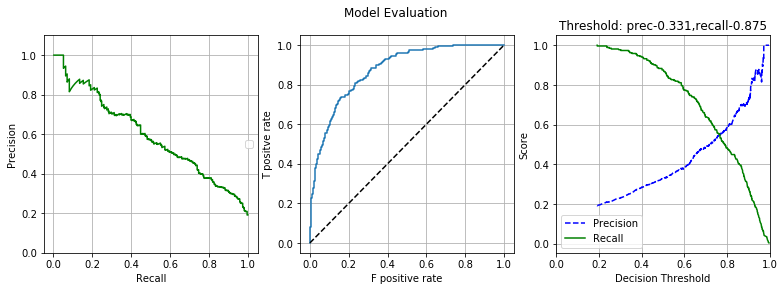

In [64]:
BinProbEval(proba_preds, label_preds, y_labels, plot=True)

No handles with labels found to put in legend.


AUC:  0.883
F1 score:  0.488
accuracy:  0.723
precision score:  0.337
recall scare:  0.883


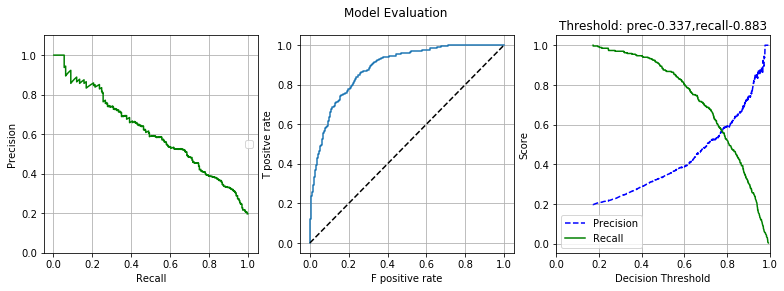

In [20]:
BinProbEval(proba_preds, label_preds, y_labels, plot=True)

No handles with labels found to put in legend.


AUC:  0.867
F1 score:  0.51
accuracy:  0.774
precision score:  0.377
recall scare:  0.789


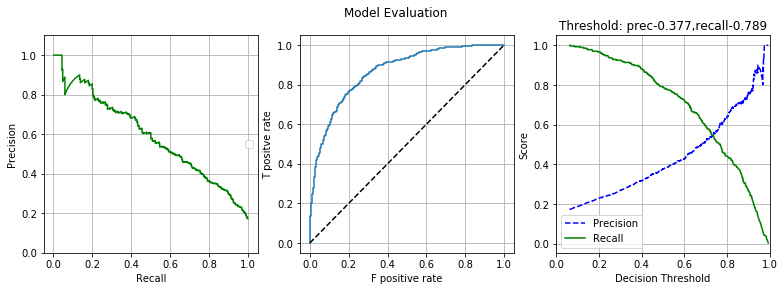

In [27]:
BinProbEval(proba_preds, label_preds, y_labels, plot=True)

No handles with labels found to put in legend.


AUC:  0.861
F1 score:  0.515
accuracy:  0.787
precision score:  0.39
recall scare:  0.758


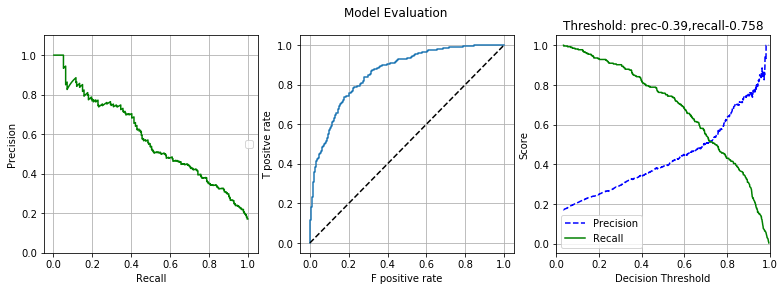

In [23]:
BinProbEval(proba_preds, label_preds, y_labels, plot=True)

No handles with labels found to put in legend.


AUC:  0.855
F1 score:  0.519
accuracy:  0.802
precision score:  0.407
recall scare:  0.717


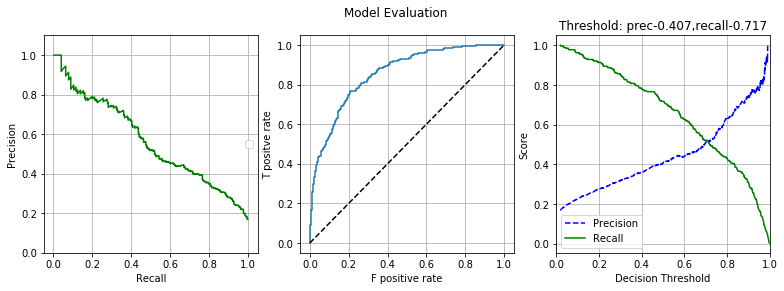

In [106]:
BinProbEval(proba_preds, label_preds, y_labels, plot=True)

# Dev

In [ ]:
break

In [8]:
# version 19.2
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from src.data.preprocess import DataFrameSelector, MakeBooleanAnInteger


from sklearn.base import BaseEstimator, TransformerMixin


import numpy as np
import pandas as pd

In [38]:
X = np.array([[1, 2], [3, 4], [1, 2], [8, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

In [39]:
X = pd.DataFrame(X,columns=['A','B'])

In [40]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]#.values

In [41]:
pipel = DataFrameSelector(['A'])

In [42]:
pipel.fit_transform(X)

,A
0,1
1,3
2,1
3,8
4,1
5,3


In [43]:
#### failed to get this to work as kept doubling size of output array. Didnt matter if get_col_list_for_after_pipeline fundtion was inside or outside of DataFrameReform class.

class DataFrameReform(BaseEstimator,TransformerMixin):
    " Takes numpy array and forms into dataframe with column names."
    def __init__(self, cols_to_include):
        self.cols_to_include = cols_to_include
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return (pd.DataFrame(X,columns=self.cols_to_include))

In [44]:
cols_to_include = ['B','A']

eg_pipeline = Pipeline([
    ('selector',DataFrameSelector(cols_to_include)),
#     ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
    ('reform_df', DataFrameReform(cols_to_include)),
])

eg_pipeline.fit_transform(X)

,B,A
0,-1.0,-0.739940
1,1.0,0.067267
2,-1.0,-0.739940
3,1.0,2.085286
4,-1.0,-0.739940
5,1.0,0.067267


In [54]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(['A','B'])),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
    ('reform_df', DataFrameReform),
])

df_reform_pipeline = Pipeline([
    ('reform_df', DataFrameReform),
])

pipes_list = [
    ('num_pipeline',num_pipeline),
#     ('df_reform_pipeline', df_reform_pipeline),
]

full_pipeline = FeatureUnion(transformer_list=pipes_list)

X_T = full_pipeline.fit_transform(X,y)

X_T

AttributeError: 'numpy.ndarray' object has no attribute 'fit'